# **SCRAPPING DATA**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [ ]:
def scrape_detik(url, min_titles=500):
    titles = []
    page = 1
    while len(titles) < min_titles:
        full_url = f"{url}?page={page}"
        print("Scraping:", full_url)

        r = requests.get(full_url)
        if r.status_code != 200:
            print("Gagal akses:", full_url)
            break

        soup = BeautifulSoup(r.text, "html.parser")

        # Selector untuk judul
        items = soup.find_all("h2", class_="title")
        if not items:
            print("Tidak ada judul ditemukan di halaman", page)
            break

        for item in items:
            judul = item.get_text(strip=True)
            titles.append(judul)

        page += 1
        time.sleep(1)  # supaya aman

    return titles[:min_titles]

In [ ]:
kategori_urls = {
    "Politik": "https://www.detik.com/tag/politik",
    "Ekonomi": "https://www.detik.com/tag/ekonomi",
    "Olahraga": "https://www.detik.com/tag/olahraga",
    "Selebritas": "https://www.detik.com/tag/seleb",
    "Teknologi": "https://www.detik.com/tag/teknologi"
}

all_data = []
for kategori, url in kategori_urls.items():
    judul_list = scrape_detik(url, min_titles=500)
    for j in judul_list:
        all_data.append({"JUDUL": j, "KATEGORI": kategori})

df = pd.DataFrame(all_data)

df.to_csv("berita_detik_5_kategori.csv", index=False, encoding="utf-8-sig")

print("Total data:", len(df))
df.head()

Scraping: https://www.detik.com/tag/politik?page=1
Scraping: https://www.detik.com/tag/politik?page=2
Scraping: https://www.detik.com/tag/politik?page=3
Scraping: https://www.detik.com/tag/politik?page=4
Scraping: https://www.detik.com/tag/politik?page=5
Scraping: https://www.detik.com/tag/politik?page=6
Scraping: https://www.detik.com/tag/politik?page=7
Scraping: https://www.detik.com/tag/politik?page=8
Scraping: https://www.detik.com/tag/politik?page=9
Scraping: https://www.detik.com/tag/politik?page=10
Scraping: https://www.detik.com/tag/politik?page=11
Scraping: https://www.detik.com/tag/politik?page=12
Scraping: https://www.detik.com/tag/politik?page=13
Scraping: https://www.detik.com/tag/politik?page=14
Scraping: https://www.detik.com/tag/politik?page=15
Scraping: https://www.detik.com/tag/politik?page=16
Scraping: https://www.detik.com/tag/politik?page=17
Scraping: https://www.detik.com/tag/politik?page=18
Scraping: https://www.detik.com/tag/politik?page=19
Scraping: https://www

,JUDUL,KATEGORI
0,Kantor DPD Golkar Maluku Diserang saat Penguru...,Politik
1,"PPP Konflik di Ancol, Padam di Kuningan",Politik
2,Adu Jotos Muktamar Partai Ka'bah,Politik
3,Melihat Ketahanan Otoritarianisme Demokratis,Politik
4,Ekonomi Politik Seafood,Politik


# **PRE PROCESSING**

# Langkah 1 – Import Library & Load Dataset

In [ ]:
import pandas as pd

df = pd.read_csv("/content/berita_detik_5_kategori.csv")
df.head()

,JUDUL,KATEGORI
0,"PPP Konflik di Ancol, Padam di Kuningan",Politik
1,Adu Jotos Muktamar Partai Ka'bah,Politik
2,Melihat Ketahanan Otoritarianisme Demokratis,Politik
3,Ekonomi Politik Seafood,Politik
4,"Jokowi Kumpul dengan Elite PSI di Bali, Beri I...",Politik


# Langkah 2 – Cek & Bersihkan Data Kosong/Duplikat

In [ ]:
# Cek info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   JUDUL     2500 non-null   object
 1   KATEGORI  2500 non-null   object
dtypes: object(2)
memory usage: 39.2+ KB


In [ ]:
# Cek nilai kosong dan duplikat
print("Missing values:", df.isnull().sum().sum())
print("Duplikat:", df.duplicated().sum())

Missing values: 0
Duplikat: 627


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Cek ulang jumlah data
print("Jumlah data setelah dibersihkan:", len(df))

Jumlah data setelah dibersihkan: 1873


In [ ]:
print("Duplikat:", df.duplicated().sum())

Duplikat: 0


# Langkah 3 – Ubah ke Huruf Kecil (Lowercase)

In [ ]:
df["JUDUL"] = df["JUDUL"].astype(str)
df["JUDUL"] = df["JUDUL"].str.lower()
(df["JUDUL"].str.islower()).value_counts()

,count
JUDUL,
True,1873


In [ ]:
df["JUDUL"].head(10)

,JUDUL
0,"ppp konflik di ancol, padam di kuningan"
1,adu jotos muktamar partai ka'bah
2,melihat ketahanan otoritarianisme demokratis
3,ekonomi politik seafood
4,"jokowi kumpul dengan elite psi di bali, beri i..."
5,rasionalitas pemilih indonesia
6,momen petinggi parpol non parlemen kumpul di k...
7,"pakai sarung-peci, kaesang sowan ke cak imin d..."
8,relawan prabowo-gibran penuhi stadion gelora d...
9,begini situasi kampanye akbar ganjar pranowo d...


# Langkah 4 – Hapus Simbol, Tanda Baca, dan Angka

In [ ]:
import re

df["JUDUL"] = df["JUDUL"].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [ ]:
df["JUDUL"].sample(10)

,JUDUL
1074,judo denpasar kali beruntun juara umum porpro...
528,video dpr kritik suntikan dana rp t jadi beba...
56,mencerna makna gibran dan dasco berfoto di mej...
1125,kebiasaan sederhana yang tak disangka bantu ce...
2072,video bukan it ini jurusan yang disarankan bos...
2432,kasur pintar yang bisa bikin hubungan lebih intim
2146,dua ceo paling cerdas menurut orang terkaya di...
1605,lesti kejora umumkan hamil anak kedua
31,video ma thailand vonis thaksin harus kembali ...
1271,pelari as alami insiden mr p selip saat lomba ...


In [ ]:
cek = df[df["JUDUL"].str.contains(r'[^a-zA-Z\s]', regex=True)]
print("Jumlah baris yang masih kotor:", len(cek))

Jumlah baris yang masih kotor: 0


# Langkah 5 – Tokenisasi

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df["tokens"] = df["JUDUL"].apply(nltk.word_tokenize)
df.head()

,JUDUL,KATEGORI,tokens
0,ppp konflik di ancol padam di kuningan,Politik,"[ppp, konflik, di, ancol, padam, di, kuningan]"
1,adu jotos muktamar partai kabah,Politik,"[adu, jotos, muktamar, partai, kabah]"
2,melihat ketahanan otoritarianisme demokratis,Politik,"[melihat, ketahanan, otoritarianisme, demokratis]"
3,ekonomi politik seafood,Politik,"[ekonomi, politik, seafood]"
4,jokowi kumpul dengan elite psi di bali beri in...,Politik,"[jokowi, kumpul, dengan, elite, psi, di, bali,..."


# Langkah 6 – Hapus Stopwords Bahasa Indonesia

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

df["tokens"] = df["tokens"].apply(lambda x: [w for w in x if w not in stop_words])
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,JUDUL,KATEGORI,tokens
0,ppp konflik di ancol padam di kuningan,Politik,"[ppp, konflik, ancol, padam, kuningan]"
1,adu jotos muktamar partai kabah,Politik,"[adu, jotos, muktamar, partai, kabah]"
2,melihat ketahanan otoritarianisme demokratis,Politik,"[ketahanan, otoritarianisme, demokratis]"
3,ekonomi politik seafood,Politik,"[ekonomi, politik, seafood]"
4,jokowi kumpul dengan elite psi di bali beri in...,Politik,"[jokowi, kumpul, elite, psi, bali, instruksi]"


In [ ]:
sisa = {word for tokens in df["tokens"] for word in tokens if word in stop_words}
print("Stopwords tersisa:", sisa)

Stopwords tersisa: set()


# Langkah 7 – Stemming Bahasa Indonesia

In [ ]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()
df["stemmed"] = df["tokens"].apply(lambda x: " ".join([stemmer.stem(word) for word in x]))
df = df[["JUDUL", "KATEGORI", "tokens", "stemmed"]]

df.head(10)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.8 MB/s eta 0:00:00


,JUDUL,KATEGORI,tokens,stemmed
0,ppp konflik di ancol padam di kuningan,Politik,"[ppp, konflik, ancol, padam, kuningan]",ppp konflik ancol padam kuningan
1,adu jotos muktamar partai kabah,Politik,"[adu, jotos, muktamar, partai, kabah]",adu jotos muktamar partai kabah
2,melihat ketahanan otoritarianisme demokratis,Politik,"[ketahanan, otoritarianisme, demokratis]",tahan otoritarianisme demokratis
3,ekonomi politik seafood,Politik,"[ekonomi, politik, seafood]",ekonomi politik seafood
4,jokowi kumpul dengan elite psi di bali beri in...,Politik,"[jokowi, kumpul, elite, psi, bali, instruksi]",jokowi kumpul elite psi bal instruksi
5,rasionalitas pemilih indonesia,Politik,"[rasionalitas, pemilih, indonesia]",rasionalitas pilih indonesia
6,momen petinggi parpol non parlemen kumpul di k...,Politik,"[momen, petinggi, parpol, non, parlemen, kumpu...",momen petinggi parpol non parlemen kumpul diam...
7,pakai sarungpeci kaesang sowan ke cak imin di ...,Politik,"[pakai, sarungpeci, kaesang, sowan, cak, imin,...",pakai sarungpeci kaesang sowan cak imin dpp pkb
8,relawan prabowogibran penuhi stadion gelora de...,Politik,"[relawan, prabowogibran, penuhi, stadion, gelo...",rawan prabowogibran penuh stadion gelora delta...
9,begini situasi kampanye akbar ganjar pranowo d...,Politik,"[situasi, kampanye, akbar, ganjar, pranowo, go...",situasi kampanye akbar ganjar pranowo gor delt...


# Langkah 8 – Simpan Data Hasil Preprocessing

In [ ]:
df.to_csv("berita_clean.csv", index=False, encoding="utf-8-sig")
print("Data hasil preprocessing berhasil disimpan sebagai berita_clean.csv")

Data hasil preprocessing berhasil disimpan sebagai berita_clean.csv


# Langkah 9 – Cek Distribusi Kategori

In [ ]:
df["KATEGORI"].value_counts()

,count
KATEGORI,
Selebritas,410
Politik,385
Ekonomi,369
Teknologi,369
Olahraga,340


Penjelasan:

Selisih antara kategori terbanyak (410) dan paling sedikit (340) cuma 70 data saja dari total 1.873 data.

Artinya variasinya hanya sekitar ±4%–5%, yang masih sangat wajar untuk dataset teks.

Dengan distribusi seperti ini, model machine learning tidak akan bias secara signifikan terhadap satu kategori tertentu.

Kesimpulan:

- Dataset seimbang (balanced).
- Tidak perlu melakukan balancing tambahan (seperti oversampling atau undersampling).

# **FEATURE EXTRACTION**

# Langkah 1 — Load Data

In [ ]:
import pandas as pd

df = pd.read_csv("/content/berita_clean.csv")
df.head()

,JUDUL,KATEGORI,tokens,stemmed
0,ppp konflik di ancol padam di kuningan,Politik,"['ppp', 'konflik', 'ancol', 'padam', 'kuningan']",ppp konflik ancol padam kuningan
1,adu jotos muktamar partai kabah,Politik,"['adu', 'jotos', 'muktamar', 'partai', 'kabah']",adu jotos muktamar partai kabah
2,melihat ketahanan otoritarianisme demokratis,Politik,"['ketahanan', 'otoritarianisme', 'demokratis']",tahan otoritarianisme demokratis
3,ekonomi politik seafood,Politik,"['ekonomi', 'politik', 'seafood']",ekonomi politik seafood
4,jokowi kumpul dengan elite psi di bali beri in...,Politik,"['jokowi', 'kumpul', 'elite', 'psi', 'bali', '...",jokowi kumpul elite psi bal instruksi


# Langkah 2 - Gunakan Kolom Stemmed dan Kategori

In [ ]:
X = df["stemmed"].astype(str)
y = df["KATEGORI"]

# Langkah 3 - TF-IDF Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    min_df=2
)

X_tfidf = tfidf.fit_transform(X)
print("Shape TF-IDF Matrix:", X_tfidf.shape)

Shape TF-IDF Matrix: (1873, 2539)


# Langkah 4 - Encode Label

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(label_encoder.classes_)


['Ekonomi' 'Olahraga' 'Politik' 'Selebritas' 'Teknologi']


# Langkah 5 - Save TF-IDF & Label Encoder

In [ ]:
import joblib

joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

print("Saved: tfidf_vectorizer.pkl dan label_encoder.pkl")

Saved: tfidf_vectorizer.pkl dan label_encoder.pkl


# **SVM**

# Langkah 1 - Load Dataset

In [ ]:
import pandas as pd

df = pd.read_csv("berita_clean.csv")
X = df["stemmed"]
y = df["KATEGORI"]

# Langkah 2 - Load TF-IDF dan Label Encoder

In [ ]:
import joblib

tfidf = joblib.load("tfidf_vectorizer.pkl")
X_tfidf = tfidf.transform(X)

label_encoder = joblib.load("label_encoder.pkl")
y_encoded = label_encoder.transform(y)

# Langkah 3 - Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Langkah 4 - Tain Model SVM

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)

LinearSVC()

# Langkah 5 - Evaluasi

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8613333333333333
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        74
           1       0.91      0.91      0.91        68
           2       0.85      0.83      0.84        77
           3       0.79      0.91      0.85        82
           4       0.90      0.82      0.86        74

    accuracy                           0.86       375
   macro avg       0.87      0.86      0.86       375
weighted avg       0.86      0.86      0.86       375



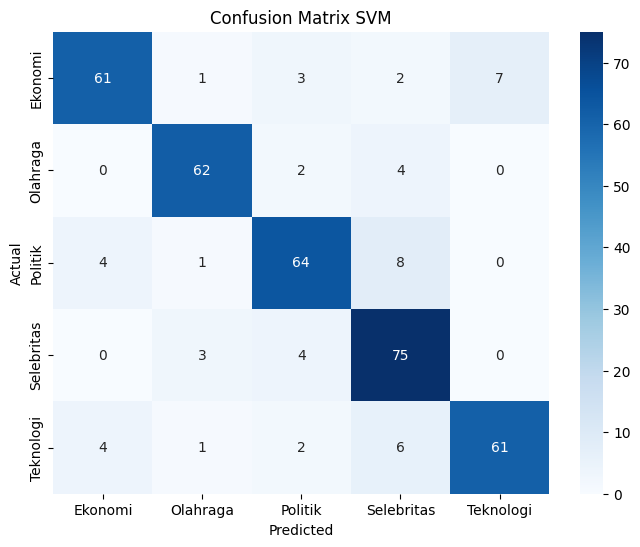

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix SVM")
plt.show()


# Langkah 6 - Save Model SVM

In [ ]:
import joblib

joblib.dump(model, "svm_model.pkl")
print("Saved: svm_model.pkl")

Saved: svm_model.pkl


# **LSTM**

# Langkah 1 - Load Dataset

In [ ]:
import pandas as pd

df = pd.read_csv("/content/berita_clean.csv")
df.head()

,JUDUL,KATEGORI,tokens,stemmed
0,ppp konflik di ancol padam di kuningan,Politik,"['ppp', 'konflik', 'ancol', 'padam', 'kuningan']",ppp konflik ancol padam kuningan
1,adu jotos muktamar partai kabah,Politik,"['adu', 'jotos', 'muktamar', 'partai', 'kabah']",adu jotos muktamar partai kabah
2,melihat ketahanan otoritarianisme demokratis,Politik,"['ketahanan', 'otoritarianisme', 'demokratis']",tahan otoritarianisme demokratis
3,ekonomi politik seafood,Politik,"['ekonomi', 'politik', 'seafood']",ekonomi politik seafood
4,jokowi kumpul dengan elite psi di bali beri in...,Politik,"['jokowi', 'kumpul', 'elite', 'psi', 'bali', '...",jokowi kumpul elite psi bal instruksi


# Langkah 2 - Gunakan kolom stemmed sebagai input text

In [ ]:
df["text_joined"] = df["stemmed"]
X = df["text_joined"]
y = df["KATEGORI"]

# Langkah 3 - Tokenizing

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)

X_seq = tokenizer.texts_to_sequences(X)

vocab_size = len(tokenizer.word_index) + 1
print("Vocab size:", vocab_size)

Vocab size: 4086


# Langkah 4 - Padding

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = max(len(s) for s in X_seq)
X_pad = pad_sequences(X_seq, maxlen=max_len, padding='post')
print("Max Length:", max_len)

Max Length: 14


# Langkah 5 - Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

y_cat = to_categorical(y_encoded, num_classes=num_classes)

# Langkah 6 - Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_pad, y_cat,
    test_size=0.2,
    random_state=42,
    stratify=y_cat
)

# Langkah 7 - Build LSTM model

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, Embedding, Dropout, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),

    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Langkah 8 - Train model

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - accuracy: 0.2281 - loss: 1.6045 - val_accuracy: 0.4733 - val_loss: 1.5776
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4398 - loss: 1.4639 - val_accuracy: 0.6400 - val_loss: 1.0707
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7697 - loss: 0.7114 - val_accuracy: 0.8100 - val_loss: 0.5319
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9762 - loss: 0.1246 - val_accuracy: 0.8400 - val_loss: 0.6020
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9962 - loss: 0.0215 - val_accuracy: 0.8267 - val_loss: 0.7637
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9997 - loss: 0.0140 - val_accuracy: 0.8367 - val_loss: 0.8237
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9994 - loss: 0.0050 - val_accuracy: 0.8400 - val_loss: 0.8589
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9978 - loss: 0.0106 - val_accuracy: 0.8333 - 

# Langkah 9 - Evaluation

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Prediksi kelas untuk test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Buat classification report
report = classification_report(
    y_true_classes,
    y_pred_classes,
    target_names=label_encoder.classes_
)

print("\n=== CLASSIFICATION REPORT ===")
print(report)

loss, acc = model.evaluate(X_test, y_test)
print("Akurasi Test:", round(acc * 100, 2), "%")

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

     Ekonomi       0.87      0.73      0.79        74
    Olahraga       0.85      0.78      0.82        68
     Politik       0.82      0.82      0.82        77
  Selebritas       0.74      0.94      0.83        82
   Teknologi       0.81      0.77      0.79        74

    accuracy                           0.81       375
   macro avg       0.82      0.81      0.81       375
weighted avg       0.82      0.81      0.81       375

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8266 - loss: 0.7725
Akurasi Test: 81.07 %


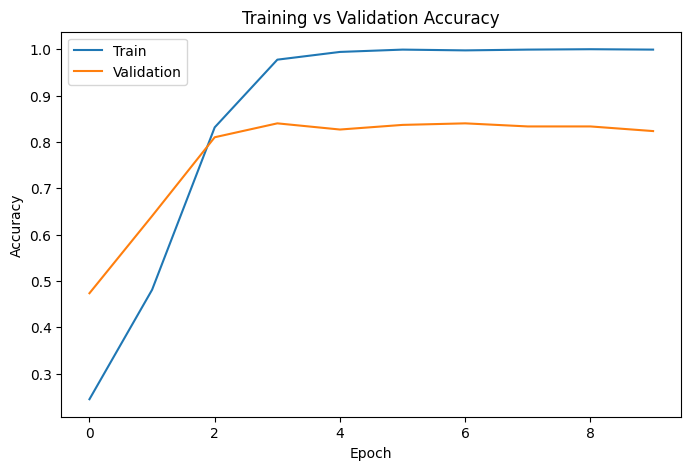

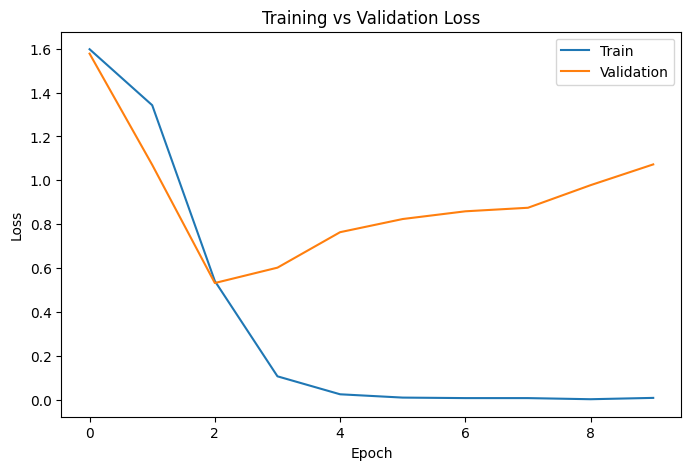

In [ ]:
import matplotlib.pyplot as plt

# Grafik Akurasi
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# Grafik Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()


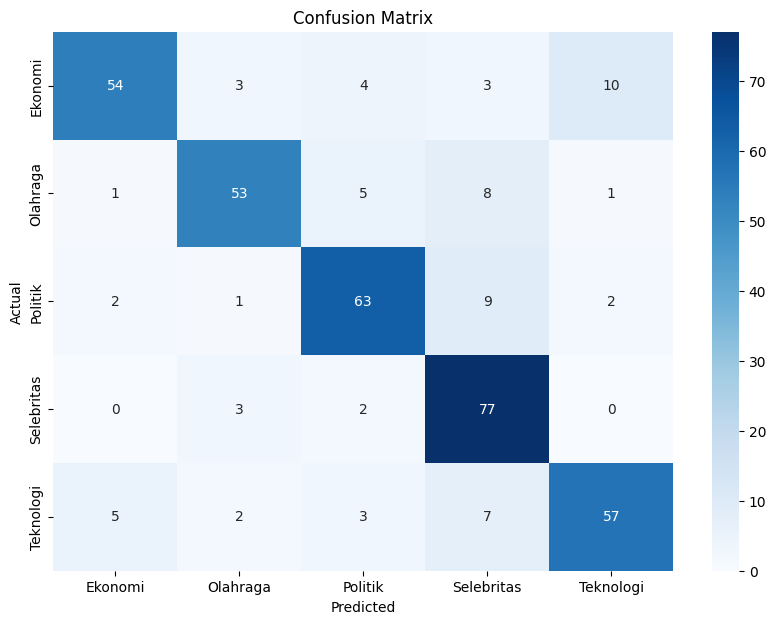

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Buat confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Langkah 10 - Simpan Model + Tokenizer + label Encoder

In [ ]:
import json
import joblib

# Simpan tokenizer
tokenizer_json = tokenizer.to_json()
with open("tokenizer_lstm.json", "w") as f:
    f.write(tokenizer_json)

# Simpan label encoder
joblib.dump(label_encoder, "label_encoder_lstm.pkl")

# Simpan model
model.save("model_lstm.h5")

print("Model, tokenizer, dan label encoder berhasil disimpan!")


Model, tokenizer, dan label encoder berhasil disimpan!


# **INDOBERT**

# Langkah 1 - Install library

In [ ]:
!pip install transformers datasets torch scikit-learn --quiet

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers import TrainingArguments, Trainer
import torch
from sklearn.preprocessing import LabelEncoder

# Langkah 2 - Load dataset

In [ ]:
import pandas as pd

df = pd.read_csv("berita_clean.csv")
df = df[['stemmed', 'KATEGORI']]
df.head()

,stemmed,KATEGORI
0,ppp konflik ancol padam kuningan,Politik
1,adu jotos muktamar partai kabah,Politik
2,tahan otoritarianisme demokratis,Politik
3,ekonomi politik seafood,Politik
4,jokowi kumpul elite psi bal instruksi,Politik


# Langkah 3 - Encode Label

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["label"] = le.fit_transform(df["KATEGORI"])
num_labels = df["label"].nunique()

df.head()

,stemmed,KATEGORI,label
0,ppp konflik ancol padam kuningan,Politik,2
1,adu jotos muktamar partai kabah,Politik,2
2,tahan otoritarianisme demokratis,Politik,2
3,ekonomi politik seafood,Politik,2
4,jokowi kumpul elite psi bal instruksi,Politik,2


# Langkah 4 - Train–Test Split

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df["label"]
)

train_df.shape, test_df.shape

((1498, 3), (375, 3))

# Langkah 5 - Convert ke Dataset HuggingFace

In [ ]:
from datasets import Dataset

train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)

# Langkah 6 - Load Tokenizer IndoBERT

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p1")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

# Langkah 7 - Tokenisasi Dataset

In [ ]:
def tokenize(batch):
    return tokenizer(
        batch["stemmed"],
        padding="max_length",
        truncation=True,
        max_length=64
    )

train_tokenized = train_ds.map(tokenize, batched=True)
test_tokenized = test_ds.map(tokenize, batched=True)

Map:   0%|          | 0/1498 [00:00<?, ? examples/s]

Map:   0%|          | 0/375 [00:00<?, ? examples/s]

# Langkah 8 - Load Model IndoBERT

In [ ]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(
    "indobenchmark/indobert-base-p1",
    num_labels=num_labels
)

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Langkah 9 - TrainingArguments

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_steps=20,
    report_to="none"
)

# Langkah 10 - Metric Akurasi (pakai evaluate)

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.3 MB/s eta 0:00:00


In [ ]:
import evaluate

accuracy_metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

# Langkah 11 - Trainer

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized,
    eval_dataset=test_tokenized,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

/tmp/ipython-input-397979581.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


# Langkah 12 - Train Model

In [ ]:
trainer.train()

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy
1,0.410300,0.384345,0.885333
2,0.244800,0.403223,0.882667
3,0.076900,0.434815,0.893333
4,0.029500,0.455471,0.890667


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=376, training_loss=0.26564047604482227, metrics={'train_runtime': 5593.4422, 'train_samples_per_second': 1.071, 'train_steps_per_second': 0.067, 'total_flos': 197075488705536.0, 'train_loss': 0.26564047604482227, 'epoch': 4.0})

# Langkah 13 - Evaluasi

In [ ]:
results = trainer.evaluate()
print("Akurasi IndoBERT :", results["eval_accuracy"])

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Akurasi IndoBERT : 0.8906666666666667


In [ ]:
from sklearn.metrics import classification_report

predictions = trainer.predict(test_tokenized)
y_pred = predictions.predictions.argmax(axis=-1)
y_true = predictions.label_ids

print(classification_report(y_true, y_pred, target_names=le.classes_))

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


              precision    recall  f1-score   support

     Ekonomi       0.93      0.85      0.89        74
    Olahraga       0.88      0.94      0.91        68
     Politik       0.88      0.92      0.90        77
  Selebritas       0.88      0.84      0.86        82
   Teknologi       0.89      0.91      0.90        74

    accuracy                           0.89       375
   macro avg       0.89      0.89      0.89       375
weighted avg       0.89      0.89      0.89       375



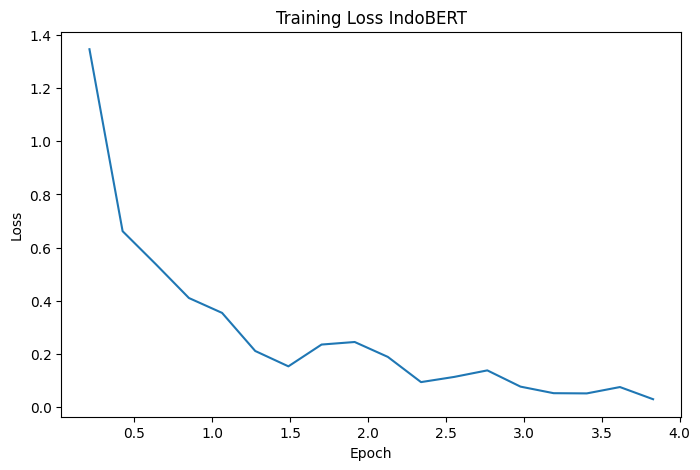

In [ ]:
train_loss = df_log[df_log["loss"].notna()]

plt.figure(figsize=(8,5))
plt.plot(train_loss["epoch"], train_loss["loss"])
plt.title("Training Loss IndoBERT")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


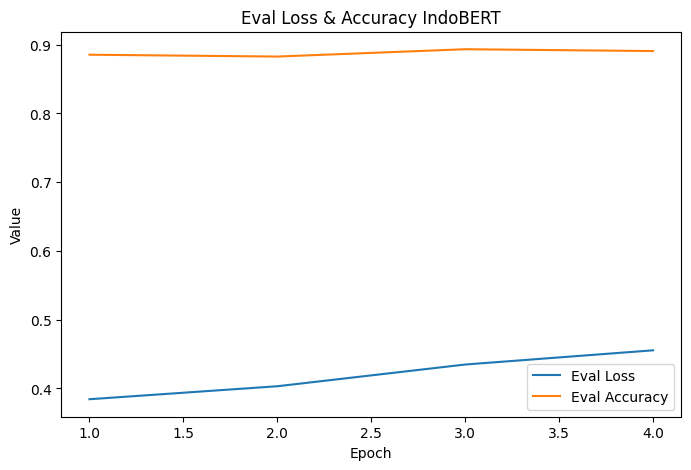

In [ ]:
eval_log = df_log[df_log["eval_loss"].notna()]

plt.figure(figsize=(8,5))
plt.plot(eval_log["epoch"], eval_log["eval_loss"], label="Eval Loss")
plt.plot(eval_log["epoch"], eval_log["eval_accuracy"], label="Eval Accuracy")
plt.title("Eval Loss & Accuracy IndoBERT")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.show()

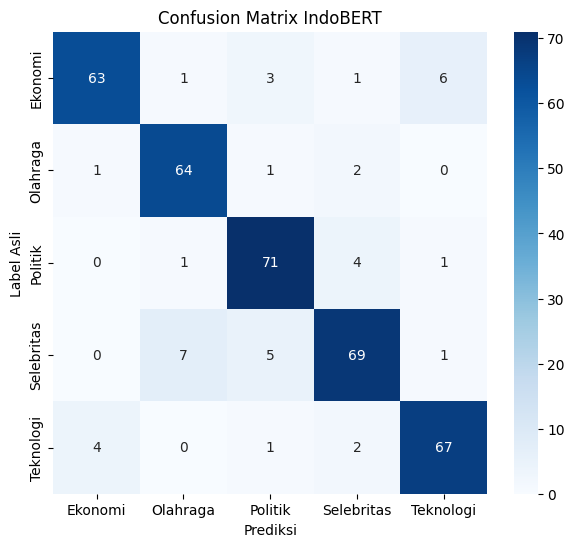

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Prediksi")
plt.ylabel("Label Asli")
plt.title("Confusion Matrix IndoBERT")
plt.show()

# Langkah 14 - Save Model

In [ ]:
model.save_pretrained("saved_indobert_model")
tokenizer.save_pretrained("saved_indobert_model")
le.classes_.dump("label_classes.pkl")  # simpan kelas label

In [ ]:
!zip -r saved_indobert_model.zip saved_indobert_model

  adding: saved_indobert_model/ (stored 0%)
  adding: saved_indobert_model/tokenizer_config.json (deflated 74%)
  adding: saved_indobert_model/config.json (deflated 57%)
  adding: saved_indobert_model/special_tokens_map.json (deflated 42%)
  adding: saved_indobert_model/vocab.txt (deflated 53%)
  adding: saved_indobert_model/model.safetensors (deflated 7%)


In [ ]:
from google.colab import files
files.download("saved_indobert_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **LORA**

# Langkah 1 - Import dan Load Dataset

In [1]:
!pip install transformers datasets evaluate peft accelerate --quiet

import pandas as pd
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.2 MB/s eta 0:00:00


In [5]:
df = pd.read_csv("berita_clean.csv")
df = df[["stemmed", "KATEGORI"]]
df.head()

,stemmed,KATEGORI
0,ppp konflik ancol padam kuningan,Politik
1,adu jotos muktamar partai kabah,Politik
2,tahan otoritarianisme demokratis,Politik
3,ekonomi politik seafood,Politik
4,jokowi kumpul elite psi bal instruksi,Politik


# Langkah 2 - Encoding Kategori

In [6]:
le = LabelEncoder()
df["label"] = le.fit_transform(df["KATEGORI"])
num_labels = df["label"].nunique()

print("Label Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

Label Mapping: {'Ekonomi': np.int64(0), 'Olahraga': np.int64(1), 'Politik': np.int64(2), 'Selebritas': np.int64(3), 'Teknologi': np.int64(4)}


# Langkah 3 - Split Train-Test

In [7]:
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df["label"]
)

train_ds = Dataset.from_pandas(train_df.reset_index(drop=True))
test_ds = Dataset.from_pandas(test_df.reset_index(drop=True))


# Langkah 4 - Tokenisasi

In [8]:
from transformers import BertTokenizerFast
tokenizer = BertTokenizerFast.from_pretrained("indobenchmark/indobert-base-p1")

def tokenize(batch):
    tokens = tokenizer(
        batch["stemmed"],
        padding="max_length",
        truncation=True,
        max_length=128
    )
    tokens["labels"] = batch["label"]
    return tokens

train_tokenized = train_ds.map(tokenize, batched=True)
test_tokenized = test_ds.map(tokenize, batched=True)

train_tokenized = train_tokenized.remove_columns(["stemmed", "KATEGORI"])
test_tokenized = test_tokenized.remove_columns(["stemmed", "KATEGORI"])


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

Map:   0%|          | 0/1498 [00:00<?, ? examples/s]

Map:   0%|          | 0/375 [00:00<?, ? examples/s]

# Langkah 5 - Load Indobert + LORA

In [9]:
from transformers import BertForSequenceClassification
from peft import LoraConfig, get_peft_model

model = BertForSequenceClassification.from_pretrained(
    "indobenchmark/indobert-base-p1",
    num_labels=num_labels
)

lora_config = LoraConfig(
    r=16,
    lora_alpha=32,
    lora_dropout=0.05,
    task_type="SEQ_CLS"
)

model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


trainable params: 593,669 || all params: 125,038,858 || trainable%: 0.4748


# Langkah 6 - Training Setup

In [12]:
from transformers import TrainingArguments, Trainer
import evaluate

accuracy_metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

training_args = TrainingArguments(
    output_dir="./results-lora-asli",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=3e-4,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_steps=10,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized,
    eval_dataset=test_tokenized,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

/tmp/ipython-input-2417101997.py:26: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [13]:
trainer.train()

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy
1,0.509700,0.418031,0.882667
2,0.236600,0.414297,0.893333
3,0.049800,0.469435,0.898667
4,0.260900,0.484610,0.893333


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=1500, training_loss=0.35373705930511157, metrics={'train_runtime': 6402.3998, 'train_samples_per_second': 0.936, 'train_steps_per_second': 0.234, 'total_flos': 396882956660736.0, 'train_loss': 0.35373705930511157, 'epoch': 4.0})

# Langkah 7 - Evaluasi

In [14]:
results = trainer.evaluate()
print("Akurasi:", results["eval_accuracy"])

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Akurasi: 0.8933333333333333


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

predictions = trainer.predict(test_tokenized)
y_true = predictions.label_ids
y_pred = predictions.predictions.argmax(-1)

print("\n=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=le.classes_))

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



=== Classification Report ===
              precision    recall  f1-score   support

     Ekonomi       0.93      0.85      0.89        74
    Olahraga       0.94      0.90      0.92        68
     Politik       0.88      0.87      0.88        77
  Selebritas       0.86      0.90      0.88        82
   Teknologi       0.88      0.95      0.91        74

    accuracy                           0.89       375
   macro avg       0.90      0.89      0.89       375
weighted avg       0.89      0.89      0.89       375



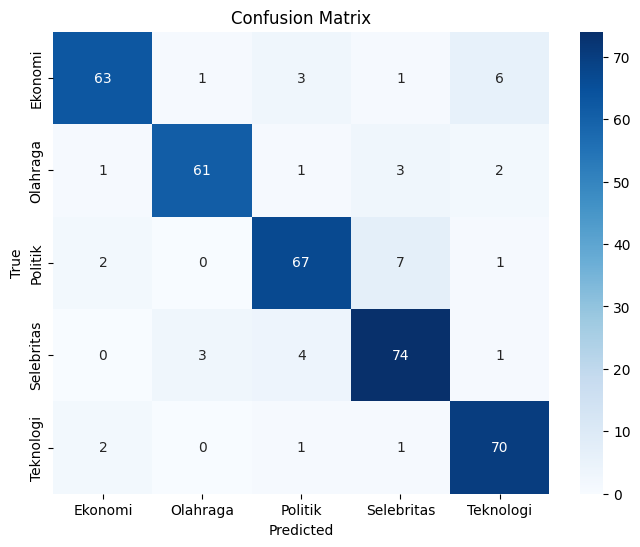

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Langkah 8 - Save Model

In [18]:
import joblib

tokenizer.save_pretrained("./model-lora/tokenizer")

model.save_pretrained("./model-lora")

joblib.dump(le, "./model-lora/label_encoder.pkl")

print("\nModel + LoRA + Tokenizer + LabelEncoder berhasil disimpan.")


Model + LoRA + Tokenizer + LabelEncoder berhasil disimpan.


In [26]:
from transformers import BertForSequenceClassification

base = BertForSequenceClassification.from_pretrained(
    "indobenchmark/indobert-base-p1",
    num_labels=num_labels
)

base.save_pretrained("./model-lora")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
import joblib
import shutil

save_dir = "./model-lora"

tokenizer.save_pretrained(f"{save_dir}/tokenizer")
model.save_pretrained(save_dir)

joblib.dump(le, f"{save_dir}/label_encoder.pkl")

print("Model + LoRA + Tokenizer + LabelEncoder berhasil disimpan.")

zip_path = shutil.make_archive("model-lora", "zip", save_dir)

print("\nZIP berhasil dibuat:", zip_path)
print("Silakan download file ZIP di file browser → model-lora.zip")


Model + LoRA + Tokenizer + LabelEncoder berhasil disimpan.

ZIP berhasil dibuat: /content/model-lora.zip
Silakan download file ZIP di file browser → model-lora.zip
